In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [10]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

### To Find the relationship between two quantitative var starting off with a scatter plot

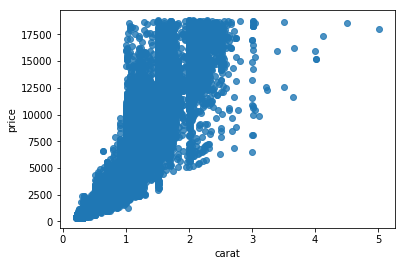

In [6]:
# bivariate plot of price vs. carat
base_color=sb.color_palette()[0]
sb.regplot(data=diamonds,x='carat',y='price',color=base_color,fit_reg=False)

Here we can see that there is a lot of data and it is overlapping.So we can use the sampling method,transparency method.More over when the data is huge we can use the heatmap<span style="color:white">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

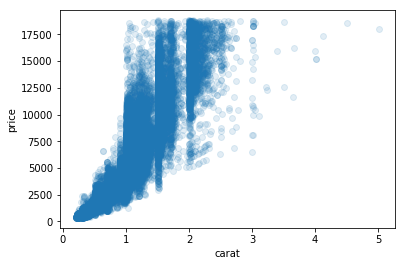

In [8]:
#adding tranparency
sb.regplot(data=diamonds,x='carat',y='price',color=base_color,fit_reg=False,scatter_kws={'alpha':1/8})

In [11]:
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Since even this graph is not pleasing lets finally use the heatmap <span style="color:white">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>

Text(0.5,0,'Weight (in Carats)')

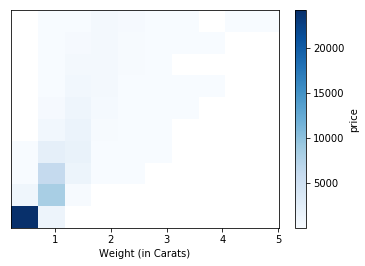

In [24]:
plt.hist2d(data=diamonds,x='carat',y='price',cmin=0.5,cmap='Blues')
plt.yticks([])
plt.colorbar(label='price')
plt.xlabel('Weight (in Carats)')

Now we can make a conclusion that most os the costliest diamonds weigh less than 1 carat!!<span style="color:white">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

### To find the relationship between a categorical variable and quantitative var we may use violinplot,boxplot,adjusted barcharts etc.Depending upon the data we have and its distribution

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

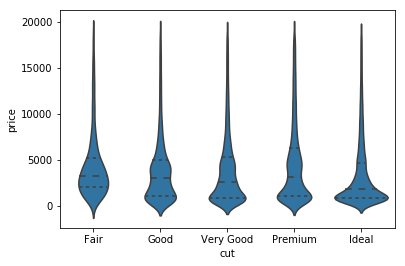

In [32]:
# bivariate plots of price vs. cut, color, clarity
#Lets startby vilonplot
base_color=sb.color_palette()[0]
sb.violinplot(data=diamonds,x='cut',y='price',inner='quartile',color=base_color)

Fair and ideal cut are positively skewed <span style="color:white">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

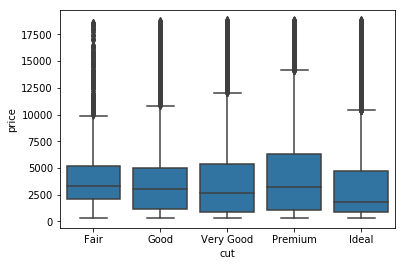

In [33]:
# bivariate plots of price vs. cut, color, clarity
sb.boxplot(data=diamonds,x='cut',y='price',color=base_color)

Cool!We can see a lot of outliers even in the above long tail in violin plot also showed that there is a lot of outlier values and suprisingly the median price for Fair,Good,VeryGood,Premium are almost the same<span style="color:white">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

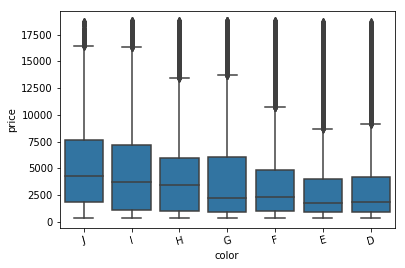

In [34]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'color', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

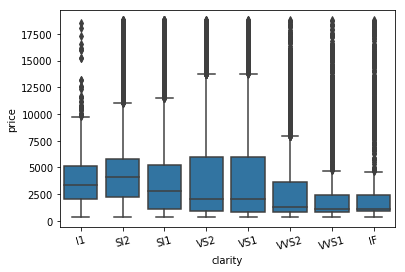

In [35]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'clarity', y='price', color=base_color)
plt.xticks(rotation = 15)

#### As there are too many labels lets use GridFaceting again to visualizeina better way

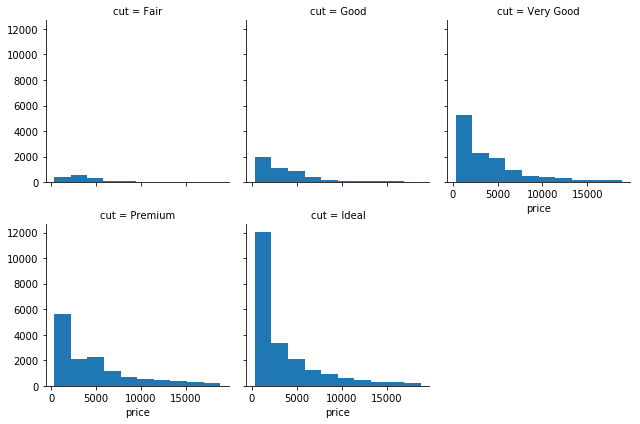

In [37]:
g = sb.FacetGrid(data = diamonds, col = 'cut',col_wrap =3)
g.map(plt.hist,'price')

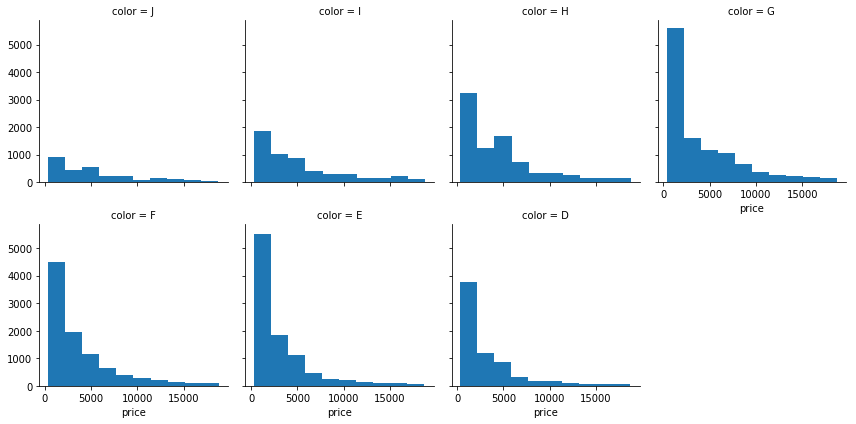

In [39]:
g = sb.FacetGrid(data = diamonds, col = 'color',col_wrap = 4)
g.map(plt.hist,'price')

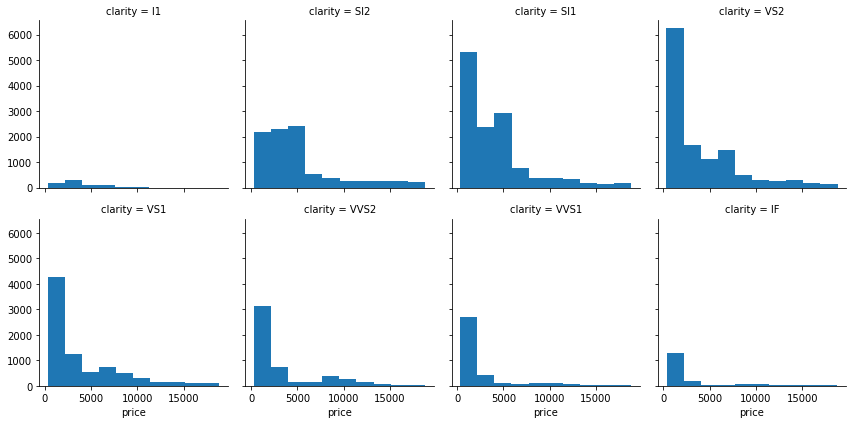

In [41]:
g = sb.FacetGrid(data = diamonds, col = 'clarity',col_wrap=4)
g.map(plt.hist,'price')

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

In [ ]:
# bivariate plots of carat vs. cut, color, clarity


These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.